# Aula 1

## Vídeo 1.2

In [1]:
lucro_por_tipo = {
  "Tomate": 2.00,
  "Alface": 1.50
}

In [2]:
# Lucro por quilo de cada tipo de alimento
lucro_por_tipo = {
    "Tomate": 2.00,
    "Alface": 1.50
}

In [3]:
# Demanda de recursos por quilo de cada tipo de alimento
# Agora, removemos o 'tempo_cuidado' e ajustamos as quantidades de água e espaço
demanda_por_tipo = {
    "Tomate": {"agua": 3, "espaco": 2},
    "Alface": {"agua": 2, "espaco": 3}
}

In [4]:
# Disponibilidade total de recursos na fazenda
disponibilidade_recursos = {
    "agua": 5900,   # litros disponíveis
    "espaco": 5400  # metros quadrados de terra arável
}

## Vídeo 1.3

$$\displaystyle \text{Máximo Tomates} = \min \left\{\frac{\text{Água disponível}}{\text{Água necessária por kg de tomate}}, \frac{\text{Espaço disponível}}{\text{Espaço necessário por kg de tomate}}\right\}$$

In [5]:
# Cálculo do máximo que pode ser produzido para cada tipo de vegetal
max_tomate = min(
    disponibilidade_recursos["agua"] / demanda_por_tipo["Tomate"]["agua"],
    disponibilidade_recursos["espaco"] / demanda_por_tipo["Tomate"]["espaco"]
)

$$\displaystyle \text{Máximo Alfaces} = \min \left\{\frac{\text{Água disponível}}{\text{Água necessária por kg de alface}}, \frac{\text{Espaço disponível}}{\text{Espaço necessário por kg de alface}}\right\}$$

In [6]:
max_alface = min(
    disponibilidade_recursos["agua"] / demanda_por_tipo["Alface"]["agua"],
    disponibilidade_recursos["espaco"] / demanda_por_tipo["Alface"]["espaco"]
)

In [7]:
max_tomate

1966.6666666666667

In [8]:
max_alface

1800.0

In [9]:
def calcular_lucro_e_viabilidade(qtd_tomate, qtd_alface):
    # Calcula o uso total de água e espaço para as quantidades escolhidas de tomate e alface
    uso_agua = qtd_tomate * demanda_por_tipo["Tomate"]["agua"] + qtd_alface * demanda_por_tipo["Alface"]["agua"]
    uso_espaco = qtd_tomate * demanda_por_tipo["Tomate"]["espaco"] + qtd_alface * demanda_por_tipo["Alface"]["espaco"]

    restricoes = {"agua": uso_agua, "espaco": uso_espaco, "diversificacao": (qtd_alface, qtd_tomate)}

    # Verifica se a combinação de produção viola as restrições de recursos e diversificação
    viola_restricoes = (
        uso_agua > disponibilidade_recursos["agua"] or
        uso_espaco > disponibilidade_recursos["espaco"] or
        qtd_tomate < 10/100*qtd_alface
    )

    # Calcula o lucro total
    lucro = qtd_tomate * lucro_por_tipo["Tomate"] + qtd_alface * lucro_por_tipo["Alface"]

    return lucro, viola_restricoes, restricoes


In [10]:
calcular_lucro_e_viabilidade(16, 0)

(32.0, False, {'agua': 48, 'espaco': 32, 'diversificacao': (0, 16)})

In [11]:
calcular_lucro_e_viabilidade(16, 0)

(32.0, False, {'agua': 48, 'espaco': 32, 'diversificacao': (0, 16)})

In [12]:
calcular_lucro_e_viabilidade(10, 5)

(27.5, False, {'agua': 40, 'espaco': 35, 'diversificacao': (5, 10)})

In [13]:
lista_solucoes = []

# Testando diferentes combinações de produção de tomates e alfaces
for qtd_tomate in range(0, int(max_tomate) + 1, 100):
    for qtd_alface in range(0, int(max_alface) + 1, 100):
        lucro, viola, restricoes = calcular_lucro_e_viabilidade(qtd_tomate, qtd_alface)
        lista_solucoes.append([qtd_tomate, qtd_alface, lucro, viola, restricoes])

        # Se a combinação não viola as restrições, imprime a solução
        if not viola:
            print(f"Tomate: {qtd_tomate} kg, Alface: {qtd_alface} kg, Lucro: R$ {lucro:.2f}")



Tomate: 0 kg, Alface: 0 kg, Lucro: R$ 0.00
Tomate: 100 kg, Alface: 0 kg, Lucro: R$ 200.00
Tomate: 100 kg, Alface: 100 kg, Lucro: R$ 350.00
Tomate: 100 kg, Alface: 200 kg, Lucro: R$ 500.00
Tomate: 100 kg, Alface: 300 kg, Lucro: R$ 650.00
Tomate: 100 kg, Alface: 400 kg, Lucro: R$ 800.00
Tomate: 100 kg, Alface: 500 kg, Lucro: R$ 950.00
Tomate: 100 kg, Alface: 600 kg, Lucro: R$ 1100.00
Tomate: 100 kg, Alface: 700 kg, Lucro: R$ 1250.00
Tomate: 100 kg, Alface: 800 kg, Lucro: R$ 1400.00
Tomate: 100 kg, Alface: 900 kg, Lucro: R$ 1550.00
Tomate: 100 kg, Alface: 1000 kg, Lucro: R$ 1700.00
Tomate: 200 kg, Alface: 0 kg, Lucro: R$ 400.00
Tomate: 200 kg, Alface: 100 kg, Lucro: R$ 550.00
Tomate: 200 kg, Alface: 200 kg, Lucro: R$ 700.00
Tomate: 200 kg, Alface: 300 kg, Lucro: R$ 850.00
Tomate: 200 kg, Alface: 400 kg, Lucro: R$ 1000.00
Tomate: 200 kg, Alface: 500 kg, Lucro: R$ 1150.00
Tomate: 200 kg, Alface: 600 kg, Lucro: R$ 1300.00
Tomate: 200 kg, Alface: 700 kg, Lucro: R$ 1450.00
Tomate: 200 kg, Alfa

## Vídeo 1.4

In [14]:
import pandas as pd

# Criando um DataFrame com os resultados
df = pd.DataFrame(lista_solucoes, columns=["qtd_tomate", "qtd_alface", "lucro", "viola_restricoes", "restricoes"])
df.head()  # Visualizando as primeiras linhas do DataFrame/

,qtd_tomate,qtd_alface,lucro,viola_restricoes,restricoes
0,0,0,0.0,False,"{'agua': 0, 'espaco': 0, 'diversificacao': (0,..."
1,0,100,150.0,True,"{'agua': 200, 'espaco': 300, 'diversificacao':..."
2,0,200,300.0,True,"{'agua': 400, 'espaco': 600, 'diversificacao':..."
3,0,300,450.0,True,"{'agua': 600, 'espaco': 900, 'diversificacao':..."
4,0,400,600.0,True,"{'agua': 800, 'espaco': 1200, 'diversificacao'..."


In [15]:
df.query("viola_restricoes == False")

,qtd_tomate,qtd_alface,lucro,viola_restricoes,restricoes
0,0,0,0.0,False,"{'agua': 0, 'espaco': 0, 'diversificacao': (0,..."
19,100,0,200.0,False,"{'agua': 300, 'espaco': 200, 'diversificacao':..."
20,100,100,350.0,False,"{'agua': 500, 'espaco': 500, 'diversificacao':..."
21,100,200,500.0,False,"{'agua': 700, 'espaco': 800, 'diversificacao':..."
22,100,300,650.0,False,"{'agua': 900, 'espaco': 1100, 'diversificacao'..."
...,...,...,...,...,...
342,1800,0,3600.0,False,"{'agua': 5400, 'espaco': 3600, 'diversificacao..."
343,1800,100,3750.0,False,"{'agua': 5600, 'espaco': 3900, 'diversificacao..."
344,1800,200,3900.0,False,"{'agua': 5800, 'espaco': 4200, 'diversificacao..."
361,1900,0,3800.0,False,"{'agua': 5700, 'espaco': 3800, 'diversificacao..."


In [16]:
row_index = df.query("viola_restricoes == False")["lucro"].idxmax()
df.loc[row_index]

qtd_tomate                                                       1500
qtd_alface                                                        700
lucro                                                          4050.0
viola_restricoes                                                False
restricoes          {'agua': 5900, 'espaco': 5100, 'diversificacao...
Name: 292, dtype: object

# Aula 2

## Vídeo 2.2

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Limites para o gráfico
x_max = 4000  # Máximo para Tomates (em quilos)
y_max = 4000  # Máximo para Alfaces (em quilos)

In [19]:
# Criando uma matriz de valores para x (Tomates) e y (Alfaces)
x = np.linspace(0, x_max, 400)
y = np.linspace(0, y_max, 400)

In [20]:
# Restrições
y1 = (5900 - 3*x) / 2  # Restrição de Água
y2 = (5400 - 2*x) / 3       # Restrição de Espaço
y3 = 10*x               # Restrição de Diversificação (Tomates pelo menos 10% de Alfaces)

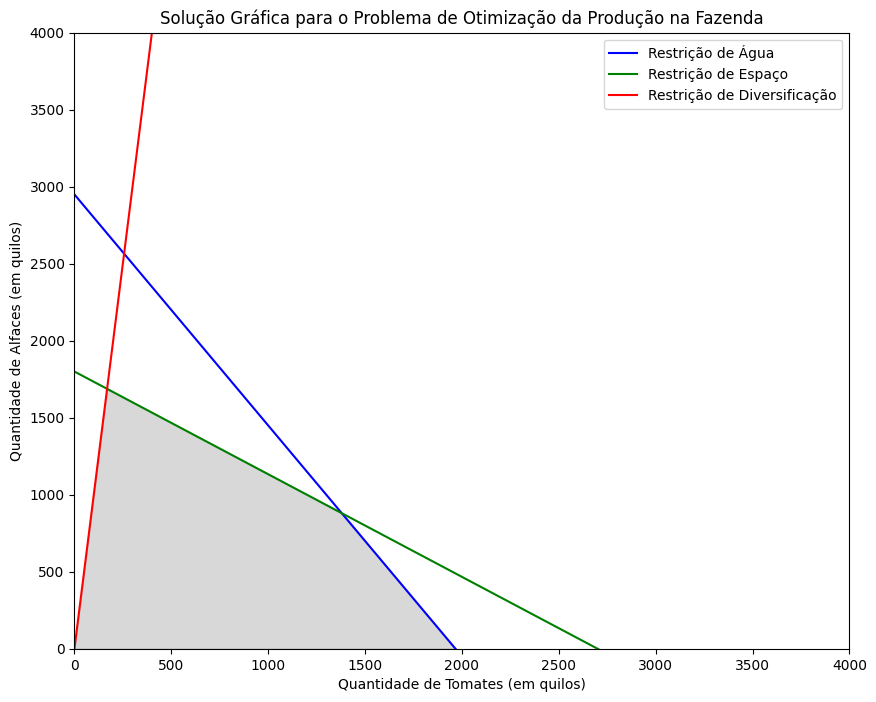

In [21]:
plt.figure(figsize=(10, 8))

# Área de solução viável
plt.fill_between(x, 0, np.minimum(np.minimum(y1, y2), y3), where=(y1 >= 0) & (y2 >= 0) & (y3 >= 0), color='gray', alpha=0.3)

# Linhas de restrição
plt.plot(x, y1, color='b', label='Restrição de Água')
plt.plot(x, y2, color='g', label='Restrição de Espaço')
plt.plot(x, y3, color='r', label='Restrição de Diversificação')

# Eixos e limites
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('Quantidade de Tomates (em quilos)')
plt.ylabel('Quantidade de Alfaces (em quilos)')

# Adicionando título e legenda
plt.title('Solução Gráfica para o Problema de Otimização da Produção na Fazenda')
plt.legend()

## Vídeo 2.3

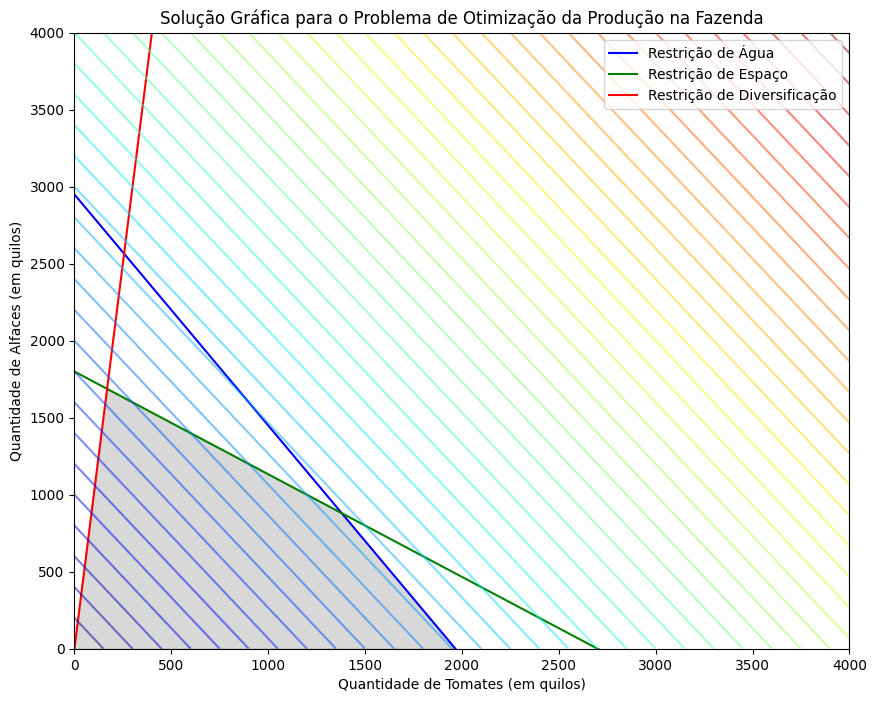

In [22]:
plt.figure(figsize=(10, 8))

# Área de solução viável
plt.fill_between(x, 0, np.minimum(np.minimum(y1, y2), y3), where=(y1 >= 0) & (y2 >= 0) & (y3 >= 0), color='gray', alpha=0.3)

# Linhas de restrição
plt.plot(x, y1, color='b', label='Restrição de Água')
plt.plot(x, y2, color='g', label='Restrição de Espaço')
plt.plot(x, y3, color='r', label='Restrição de Diversificação')

# Curvas de nível para a função objetivo
X, Y = np.meshgrid(x, y)

# Função objetivo: Z = 2x_Tomate + 1.5x_Alfaces
Z = 2*X + 1.5*Y

plt.contour(X, Y, Z, 50, alpha=0.5, cmap='jet')


# Eixos e limites
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('Quantidade de Tomates (em quilos)')
plt.ylabel('Quantidade de Alfaces (em quilos)')

# Adicionando título e legenda
plt.title('Solução Gráfica para o Problema de Otimização da Produção na Fazenda')
plt.legend()